In [6]:
# Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sc
from bokeh import __version__ as bk_version

pd.set_option("display.max_columns", None)

In [3]:
# Import the dataset

df = pd.read_csv("Dataset/freMTPL2freq.csv")

df["freq"] = df["ClaimNb"] / df["Exposure"]
df["LogDensity"] = np.log(df["Density"])

df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,freq,LogDensity
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,0.263964,5.981771
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,4.593915,1.870453
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000,4.521789
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000,5.973810
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000,7.413367
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,732.000000,10.203592


In [5]:
# Creating the subset of data

random_subset = df.sample(n=20000)
subset_summary = random_subset.describe()

subset_summary

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,freq,LogDensity
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,2.615255e+06,0.053700,0.533307,6.465800,7.028800,45.560400,59.67350,1763.027450,0.232835,5.981266
std,1.631167e+06,0.238996,0.364446,2.041406,5.659591,14.156584,15.54073,3891.719567,2.778182,1.860888
min,3.200000e+01,0.000000,0.002732,4.000000,0.000000,18.000000,50.00000,1.000000,0.000000,0.000000
25%,1.160494e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.00000,93.000000,0.000000,4.532599
50%,2.272610e+06,0.000000,0.500000,6.000000,6.000000,44.000000,50.00000,393.000000,0.000000,5.973810
75%,4.041333e+06,0.000000,1.000000,7.000000,11.000000,55.000000,64.00000,1622.000000,0.000000,7.391415
max,6.114307e+06,3.000000,1.480000,15.000000,99.000000,99.000000,166.00000,27000.000000,183.000000,10.203592


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plotBarCharts(data, x, ylimitFREQ, n=10):
    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    # Get all unique categories from data (ensures every possible category is present)
    categories = sorted(data[x].unique().tolist())
    cat2idx = {cat: i for i, cat in enumerate(categories)}
    idx2cat = {i: cat for cat, i in cat2idx.items()}

    # Group data for exposure and frequency
    exposure_df = data.groupby(x, as_index=False).agg({'Exposure': 'sum'})
    freq_df     = data.groupby(x, as_index=False).agg({'freq': 'mean'})

    # Map grouped data to all category positions
    exposure_vals = [exposure_df.loc[exposure_df[x] == idx2cat[i], 'Exposure'].values[0] if (exposure_df[x] == idx2cat[i]).any() else 0 for i in range(len(categories))]
    freq_vals     = [freq_df.loc[freq_df[x] == idx2cat[i], 'freq'].values[0] if (freq_df[x] == idx2cat[i]).any() else 0 for i in range(len(categories))]

    xpos = list(range(len(categories)))  # 0 ... N-1

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Exposure Plot
    axs[0].bar(xpos, exposure_vals)
    axs[0].set_xlabel(x, fontsize=12)
    axs[0].set_ylabel('Total Exposure', fontsize=12)
    axs[0].set_title(f"Exposure by {x}", fontsize=16, fontweight='bold')
    axs[0].set_xlim(-0.5, len(categories) - 0.5)  # Include first and last ticks
    axs[0].set_xticks(xpos)
    axs[0].set_xticklabels(categories, rotation=45, fontsize=10)

    # for i, val in enumerate(exposure_vals):
    #     if val > 0:
    #         axs[0].annotate(f'{val:.0f}', (i, val), ha='center', va='bottom', fontsize=10)

    # Frequency Plot
    axs[1].bar(xpos, freq_vals)
    axs[1].set_xlabel(x, fontsize=12)
    axs[1].set_ylabel('Mean Frequency', fontsize=12)
    axs[1].set_title(f"Mean Frequency by {x}", fontsize=16, fontweight='bold')
    axs[1].set_ylim(0, ylimitFREQ)
    axs[1].set_xlim(-0.5, len(categories) - 0.5)
    axs[1].set_xticks(xpos)
    axs[1].set_xticklabels(categories, rotation=45, fontsize=10)

    # for i, val in enumerate(freq_vals):
    #     if val > 0:
    #         axs[1].annotate(f'{val:.2f}', (i, val), ha='center', va='bottom', fontsize=10)

    plt.suptitle('Insurance Data Insights: Exposure & Frequency', fontsize=18, fontweight='bold', color='#444')
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()


# Data Exploration

### Explore each explanatory variable using subset data

### Keeping Frequency at 2

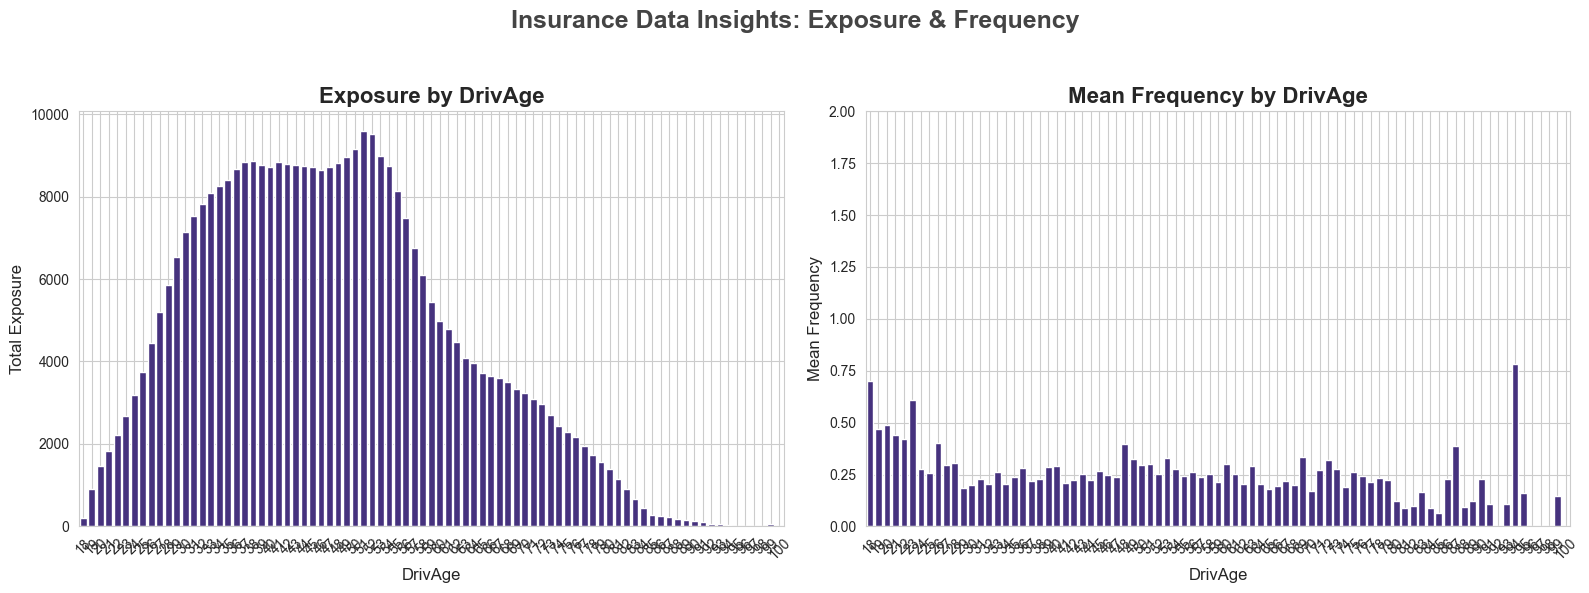

CPU times: total: 1.02 s
Wall time: 1.32 s


In [53]:
%%time

plotBarCharts(df, "DrivAge", 2)

In [18]:
# Exposure largely concentrated in age between ~28 to ~58

# Frequency in Most younder and most older ages of driver

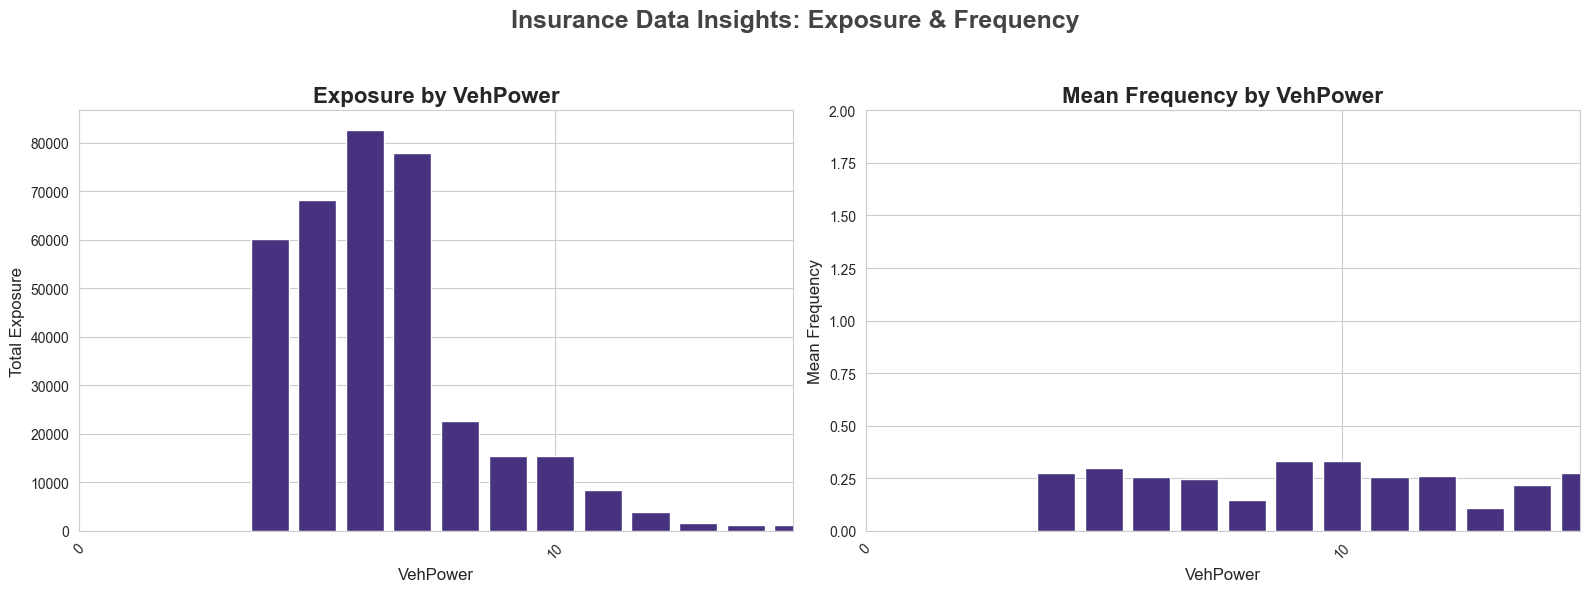

CPU times: total: 219 ms
Wall time: 385 ms


In [43]:
%%time

plotBarCharts(df, "VehPower", 2)

In [20]:
# Vehicle with less power tends to have more Exposure

# Nothing noticable with Frequency in Power of Vehicle

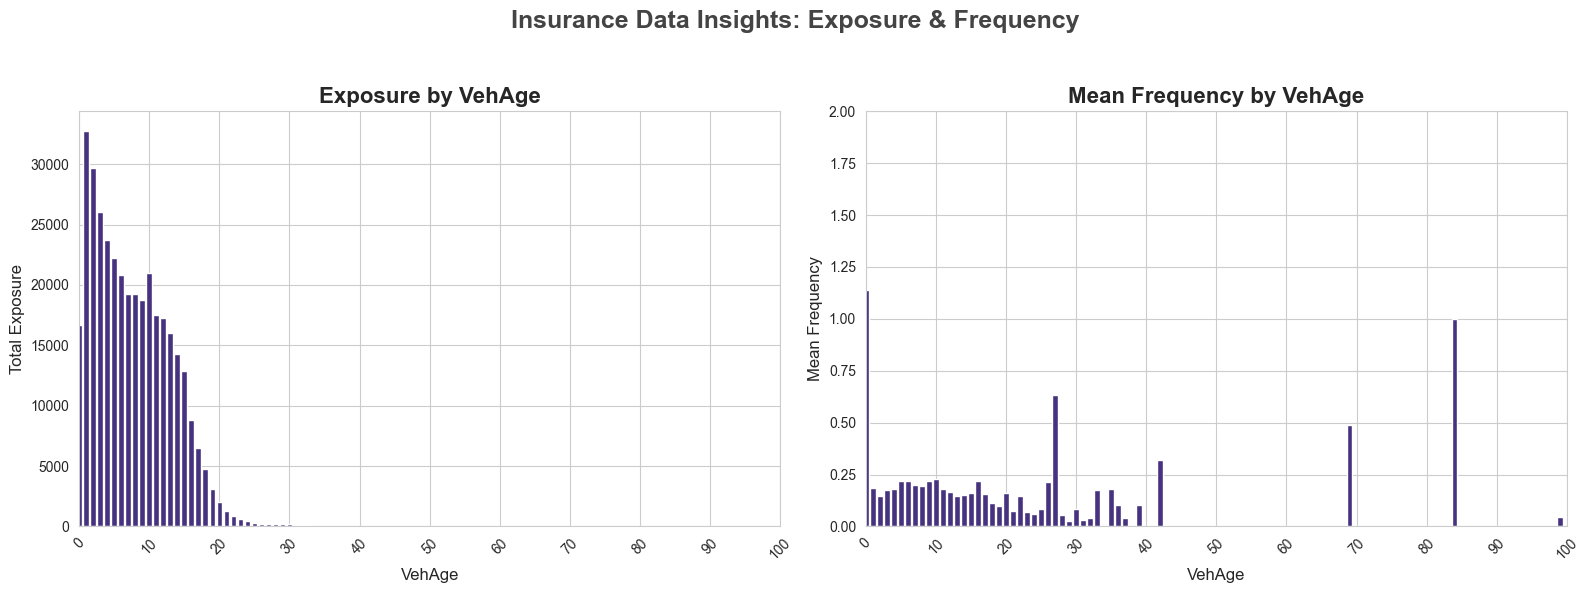

CPU times: total: 391 ms
Wall time: 830 ms


In [44]:
%%time

plotBarCharts(df, "VehAge", 2)

In [22]:
# At starting years of Vehicle, it tends to have more Exposure

# At Start 0, and at the end, Frequency is high

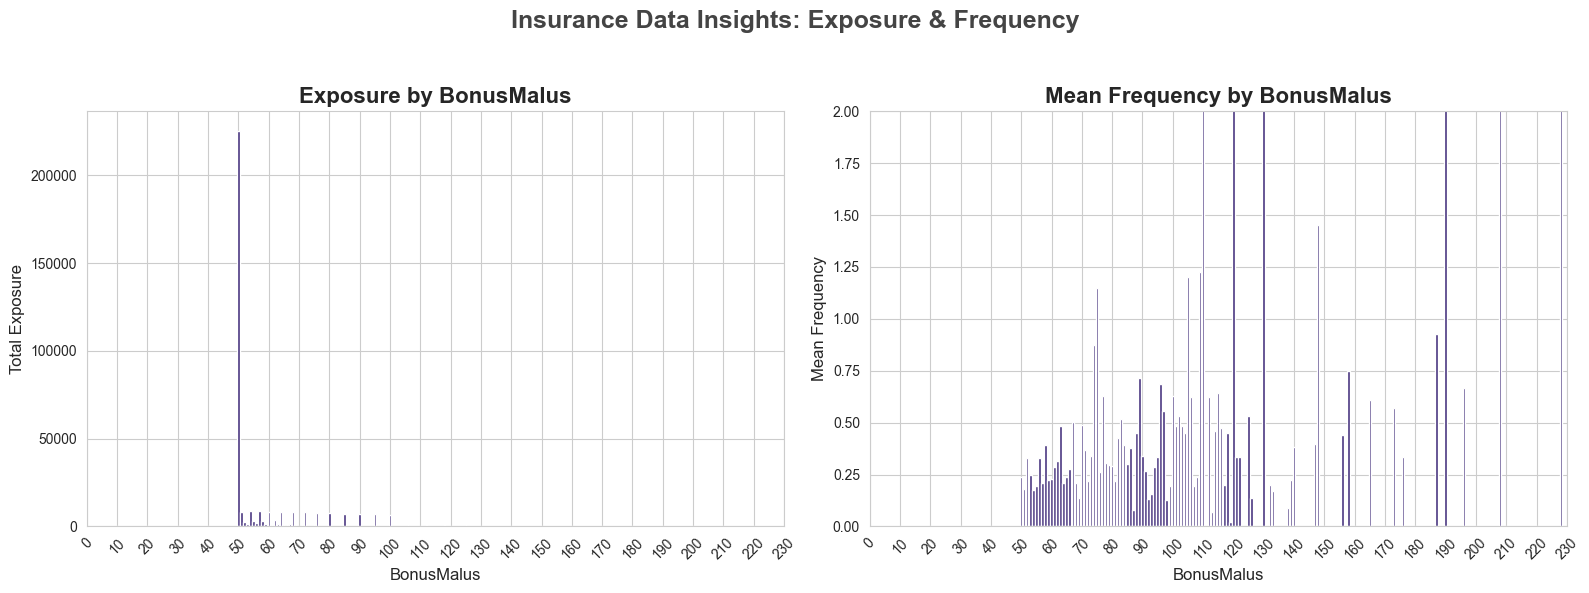

In [45]:
plotBarCharts(df, "BonusMalus", 2)

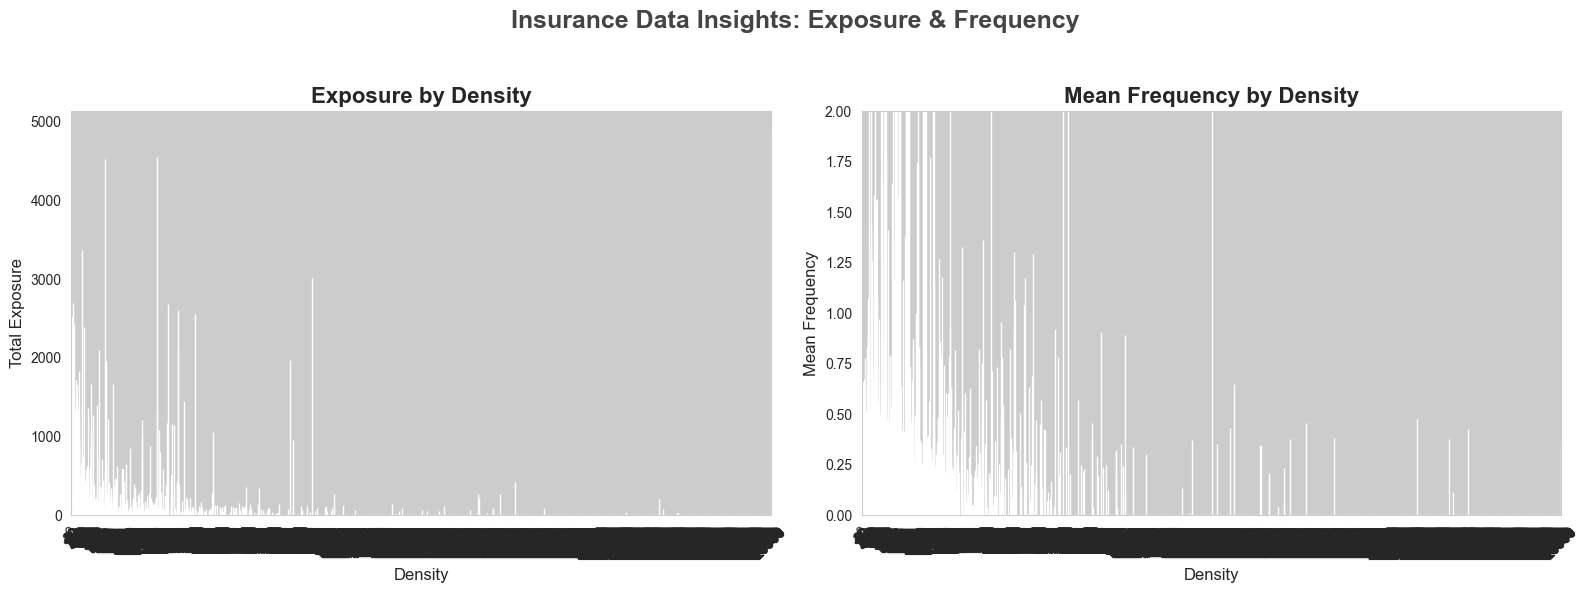

In [46]:
plotBarCharts(df, "Density", 2)

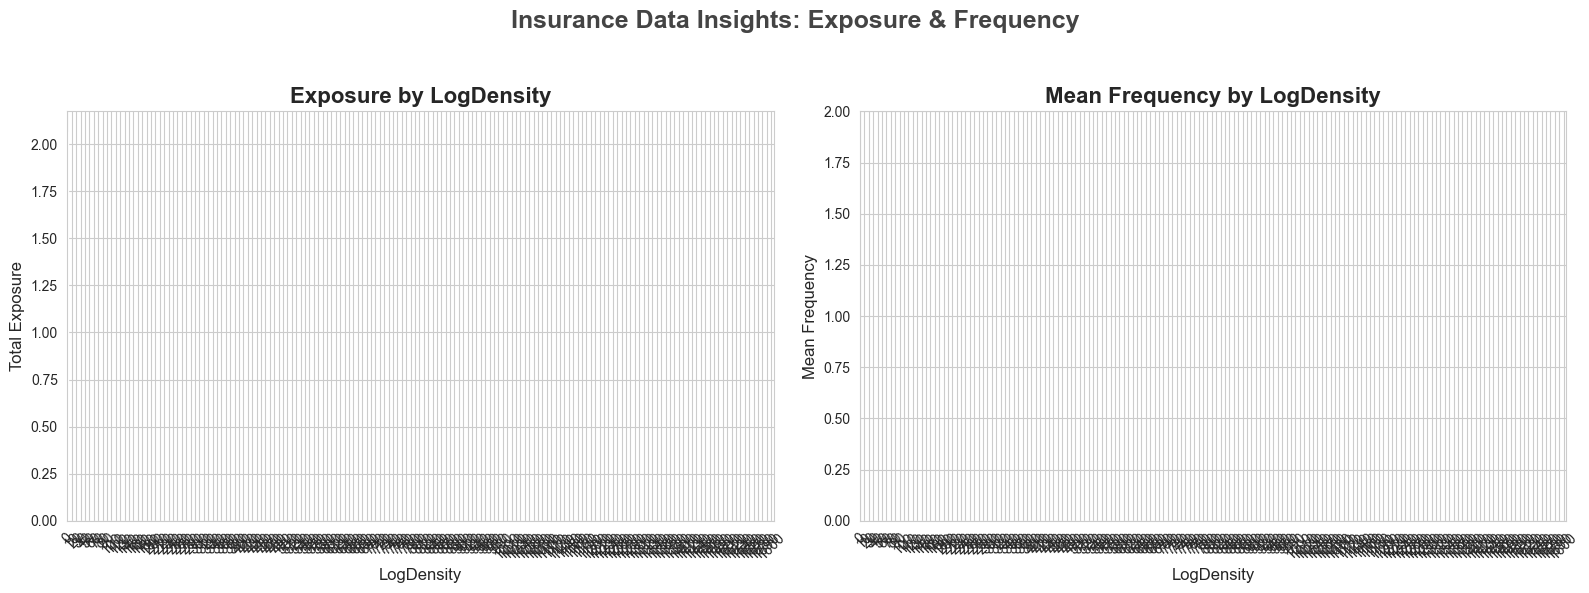

In [47]:
plotBarCharts(df, "LogDensity", 2)

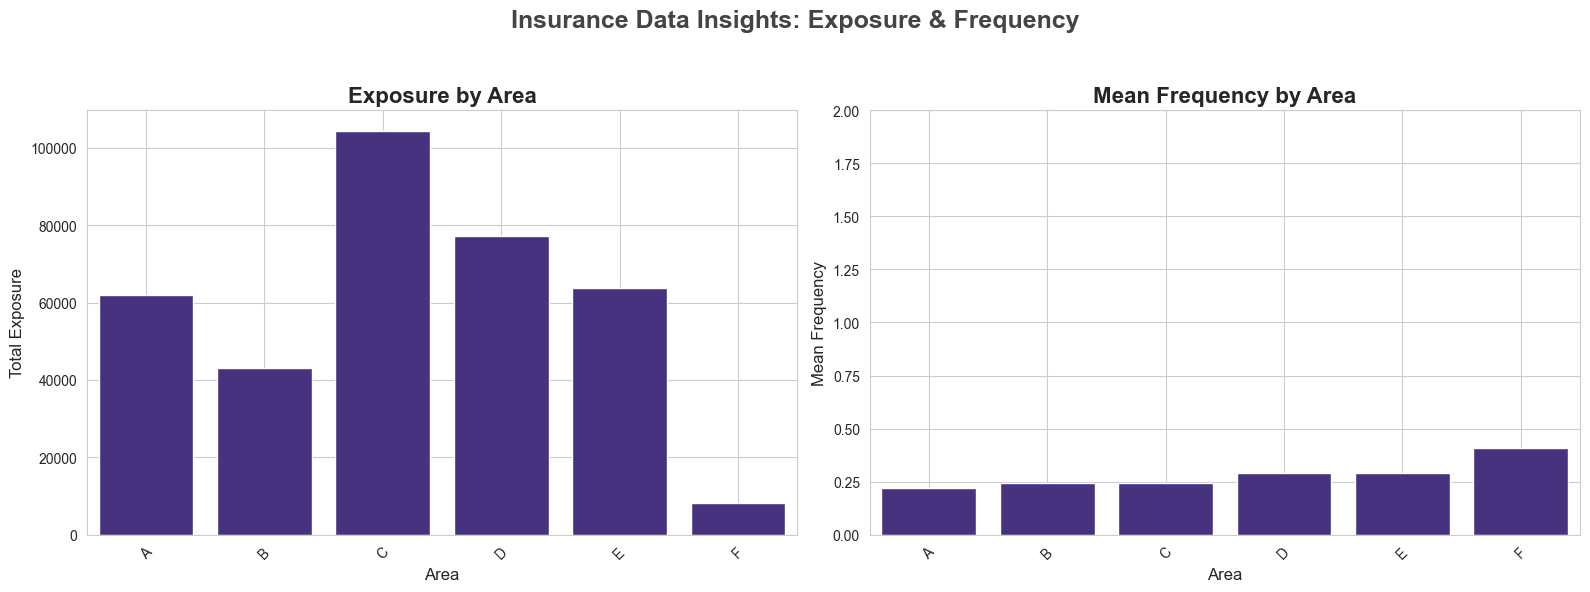

In [54]:
plotBarCharts(df, "Area", 2)

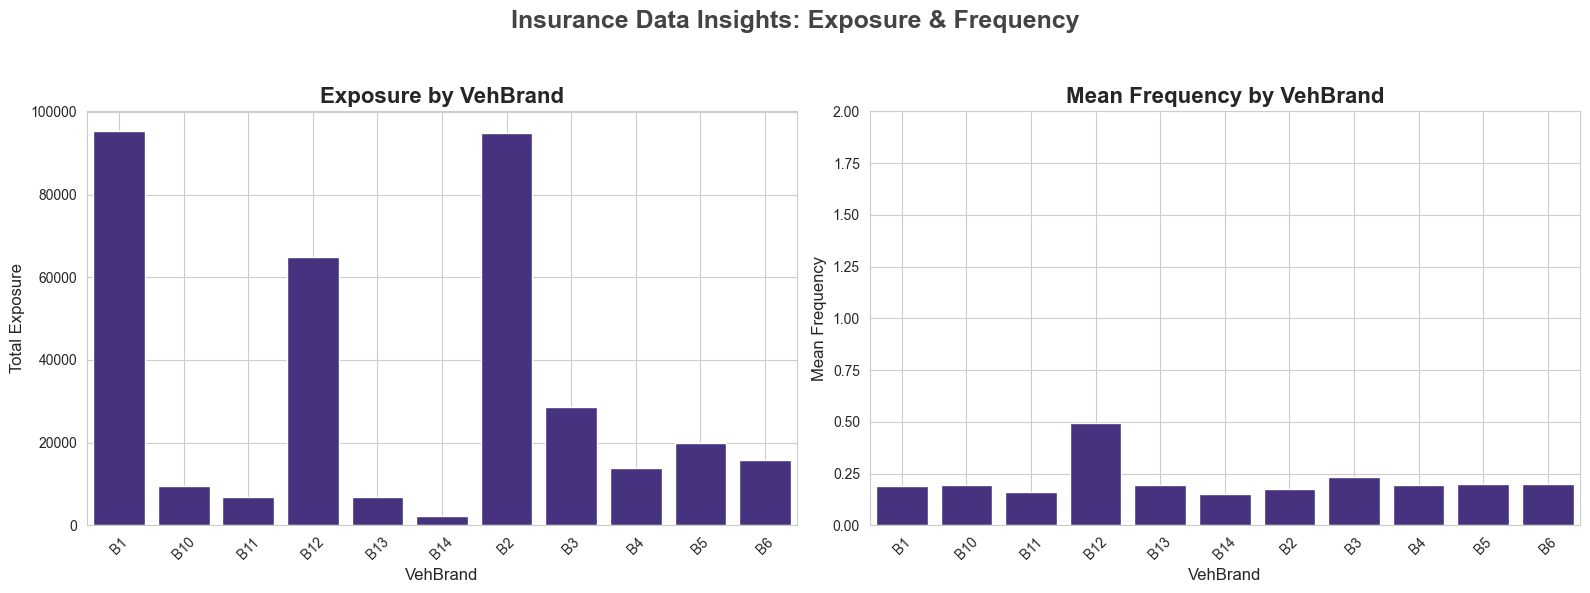

In [56]:
plotBarCharts(df, "VehBrand", 2)

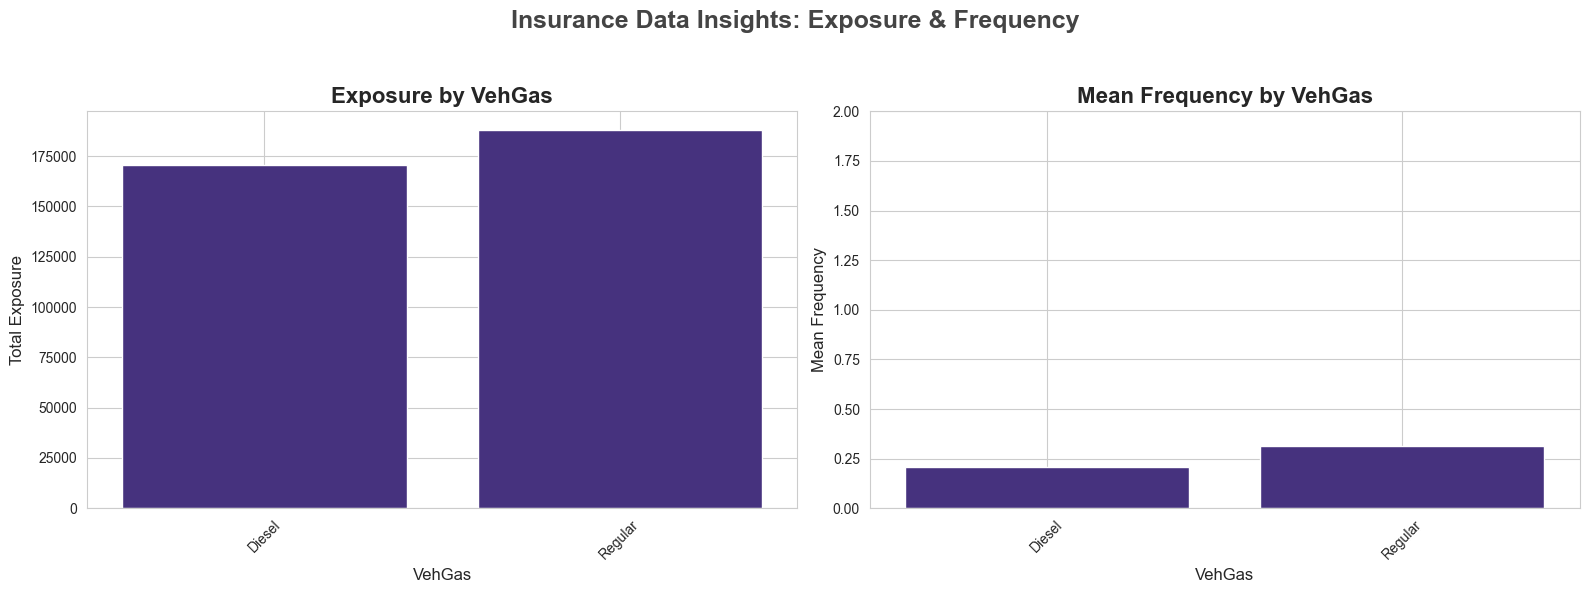

In [57]:
plotBarCharts(df, "VehGas", 2)

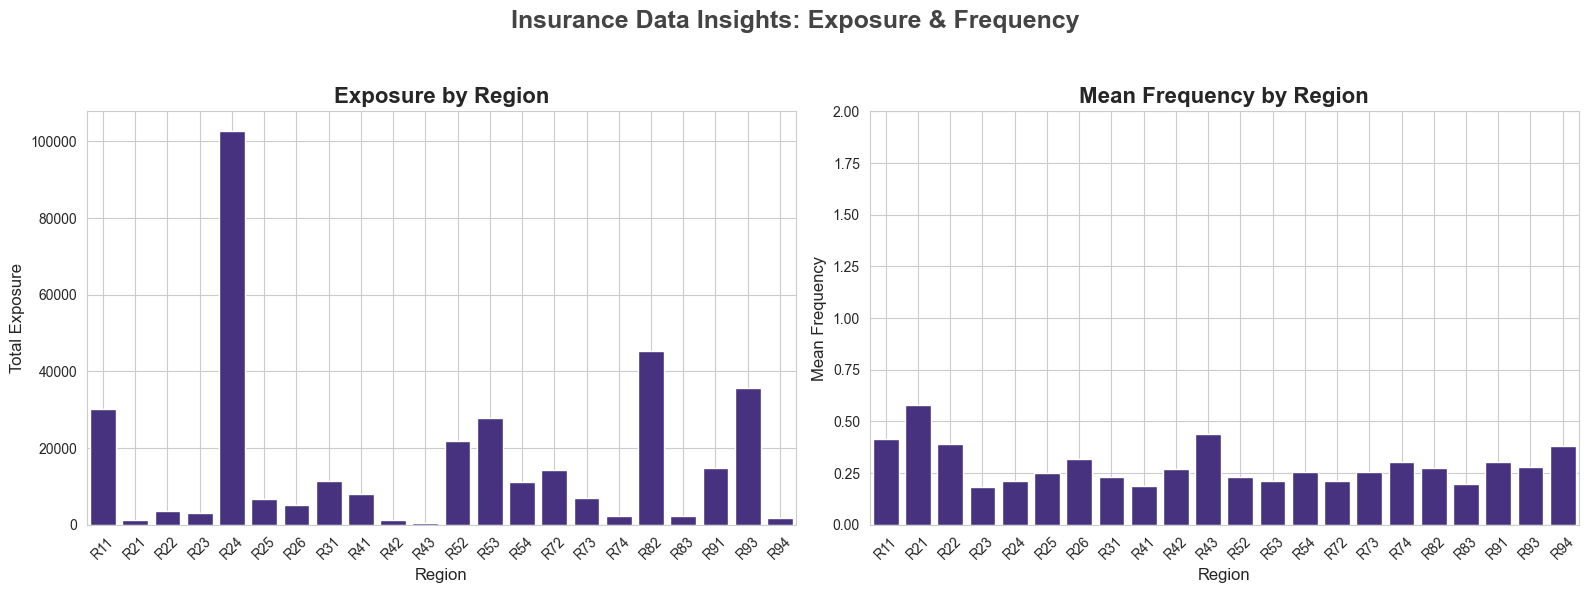

In [58]:
plotBarCharts(df, "Region", 2)

In [59]:
# Modeling

In [60]:
df.isnull().sum()

IDpol         0
ClaimNb       0
Exposure      0
Area          0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
VehBrand      0
VehGas        0
Density       0
Region        0
freq          0
LogDensity    0
x_bin         0
dtype: int64

In [61]:
# One Hot Encoding for make this dataframe suitable for the XGBoost Model

In [63]:
df_new = pd.get_dummies(df, prefix = ["Area", "VehBrand", "VehGas", "Region"], 
                        columns= ["Area", "VehBrand", "VehGas", "Region"])

print(df.describe())

              IDpol        ClaimNb       Exposure       VehPower  \
count  6.780130e+05  678013.000000  678013.000000  678013.000000   
mean   2.621857e+06       0.053247       0.528750       6.454631   
std    1.641783e+06       0.240117       0.364442       2.050906   
min    1.000000e+00       0.000000       0.002732       4.000000   
25%    1.157951e+06       0.000000       0.180000       5.000000   
50%    2.272152e+06       0.000000       0.490000       6.000000   
75%    4.046274e+06       0.000000       0.990000       7.000000   
max    6.114330e+06      16.000000       2.010000      15.000000   

              VehAge        DrivAge     BonusMalus        Density  \
count  678013.000000  678013.000000  678013.000000  678013.000000   
mean        7.044265      45.499122      59.761502    1792.422405   
std         5.666232      14.137444      15.636658    3958.646564   
min         0.000000      18.000000      50.000000       1.000000   
25%         2.000000      34.000000      5